## <span style="color: forestgreen;">Optimization Algorithms - Solution to Exercise 1.3</span>

Graphically determine a minimizer of the function

<p></p>

<center><span style="font-weight: lighter;">$\large f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 1)^2,\tag{1}$</span></center>

<p>subject to constraints</p>

##### <span style="color: black;"><u>Constraint $c_1:$</u></span>

<p></p>

<center><span style="color: black;">$x_1^2 - x_2 \le 0\tag{2}$</span></center>

##### <span style="color: black;"><u>Constraint $c_2:$</u></span>

<p></p>

<center><span style="color: black;">$x_1 + x_2 \le 2\tag{3}$</span></center>

<p></p>
<br>
<p>Use Python, numpy, and matplotlib to draw the function and the constraints, determine a minimizer visually, and
    justify your answer. Is the minimizer <i>local</i> or <i>global</i>?</p>

In [ ]:
# Install numpy and matplotlib pip packages in the current Jupyter kernel;
# we know these specific versions, numpy 1.19.3 and matplotlib 1.15.0, work.
import sys
!{sys.executable} -m pip install numpy==1.19.3
!{sys.executable} -m pip install matplotlib==3.3.4

In [1]:
###############################################################################
import numpy as np
from matplotlib import pyplot as plt
###############################################################################
import SMPlotUtilities as smplt
###############################################################################

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

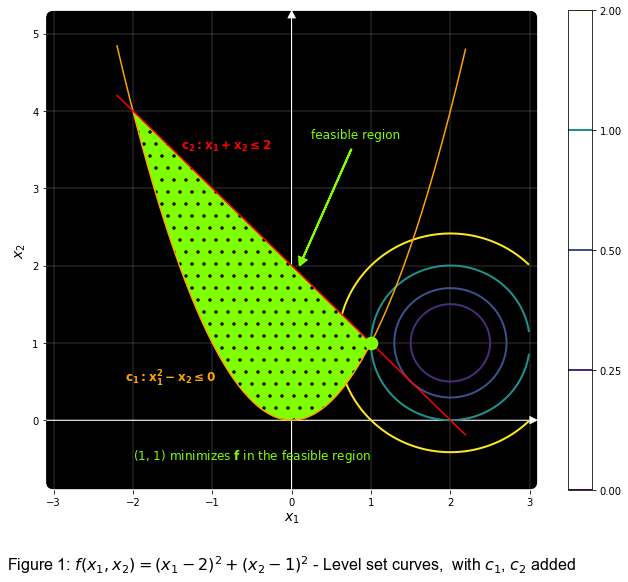

In [3]:
###############################################################################
plt.rcParams['figure.figsize'] = [smplt.mpSize["w"], smplt.mpSize["h"]]
###############################################################################
fig, ax = plt.subplots()
###############################################################################
smplt.EnvelopeRoundedCompact(ax, smplt.mp2RndBnds)
###############################################################################
#x1_points = np.arange(-0.25, 3.25, 0.01)
#x2_points = np.arange(-0.25, 3.25, 0.01)
###############################################################################
x1, x2, f, levellist = smplt.TranslatedCircleCompact(smplt.mp2Pts, 0x2, 0x1)
###############################################################################                     
# Setup the PDF as a contour plot
###############################################################################
cp = ax.contour(x1, x2, f, levels=levellist, linewidths=2)
###############################################################################
# Set a colorbar legend to appear with the plot
###############################################################################
fig.colorbar(cp)
###############################################################################
# Constraint c1
###############################################################################
x1c = smplt.mp2C1["rng"]
c1 = x1c**2
ax.plot(x1c, c1, smplt.mp2C1["attr"]["color"], smplt.mp2C1["attr"]["lw"],
        smplt.mp2C1["attr"]["zorder"])
plt.text(smplt.mp2C1["txtx"], smplt.mp2C1["txty"], smplt.mp2C1["ineq"],
         smplt.mp2C1["tattr"])
###############################################################################
# Constraint c2
###############################################################################
c2 = 2 - x1c
ax.plot(x1c, c2, smplt.mp2C2["attr"]["color"], smplt.mp2C2["attr"]["lw"],
        smplt.mp2C2["attr"]["zorder"])
plt.text(smplt.mp2C2["txtx"], smplt.mp2C2["txty"], smplt.mp2C2["ineq"],
         smplt.mp2C2["tattr"])
###############################################################################
# Fill the "feasible" region with color DodgerBlue                                                       
###############################################################################                    
ax.fill_between(x1c, c1, c2, where=(c1 <= c2), facecolor='Chartreuse',
                hatch='.', zorder=2)
###############################################################################
# Indicate the feasible region
###############################################################################
smplt.DrawArrow(plt, smplt.mp2C2["arrowsx"], smplt.mp2C2["arrowsy"],
                smplt.mp2C2["arrowdx"], smplt.mp2C2["arrowdy"],
                smplt.pCol["C"], 2, 0.1, True, 0.1)
plt.text(smplt.mp2C2["fsx"], smplt.mp2C2["fsy"], 'feasible region',
         color=smplt.pCol["C"], fontsize="large", zorder=20)
###############################################################################
# Mark the lowest value of f in the feasible region
###############################################################################
plt.scatter([smplt.mp2C2["spx"]], [smplt.mp2C2["spy"]], s=160, zorder=50,
            color=smplt.pCol["C"])
plt.text(smplt.mp2C2["sptx"], smplt.mp2C2["spty"], smplt.mp2C2["sptxt"],
         color=smplt.pCol["C"], fontsize="large", zorder=20)
###############################################################################
# Title, axis labels, extents, grid color, background and line style
###############################################################################
smplt.SetupPlotCompact(ax, plt, "$x_1$", "$x_2$", smplt.mp2Bnds, "",
                       smplt.mp2C2["cap"], smplt.mp2CapLoc) 
###############################################################################
plt.show()

#### <span style="color: forestgreen;">Informal Justification (without appealing to Necessary and Sufficient Conditions)</span>

$f(x_1, x_2) \ge 0, \forall\ (x_1, x_2) \in \mathbb{R}^2$ since $f$ is the sum of two square terms. In fact  $(x_1 - 2)^2 \ge 0$ and $(x_2 - 1)^2 \ge 0$, since each is a square. The least value that $f$ can take is $0$ and that can happen only when each of the two terms are $0$, which means $x_* = (x_1 = 2, x_2 = 1) = (2, 1)$. This $x_*$ is the <i>global</i> minimum, absent any constraints. Further, the value of $f$ increases radially away from $(2, 1)$ as shown by the level-set curves.

<p>The question we have to ask ourselves in the presence of constraints, however, is, "How close can we get to $(2, 1)$ while remaining within the feasible region?" A visual inspection yields the answer of $(1, 1)$. From the geometry of the problem it is clear that $(1, 1)$ is also the <i>global</i> minimum in the presence of the constraints since every other point in the feasible region is further away from $(2, 1)$ than $(1, 1)$.